# [Campus Placement Prediction - Group 4]

Group Members:

Emre Medeni 28262  
Çise Göksu Uzun 28502  
Uğurcan Uğur 26448  
Okan Arslantaş 26345  
Mert Ali Binatlı 27964  
Efe Çankaya 28246

## Introduction

We wondered how the campus placements was done and if it had anything to do with the qualities of the students. Campus placements are important for students because they provide an opportunity for students to secure a job before they graduate. This allows students to start their careers earlier and get a head start in the job market. Campus placements also provide an opportunity for students to showcase their skills and abilities to potential employers and build their professional network. Moreover, we didn't have any idea what are the qualities that companies look for when they accept a student. Due to that, this project -by using a data set about campus recruitment- searched the relation between placements and qualities of the students. 

</font>



### Problem Definition

</font>  

The main aim of this project is to find which conditions affect the placement of the students. We will also try to predict whether a given student will get a placement or not based on the given qualities. We will achieve this by examining the effect of the qualities such as grades, specialization, gender has for a student to get placed.

### Utilized Datasets


</font>


Our data set is about campus recruitment. It includes data from 215 students in 15 columns. It consists of gender, percentages from different levels of education such as 10th grade or MBA, field of degree education, work experience, placement status and salary offered to placed students. We are not planning to collect more data since there is enough detailed information.  

**Link:** https://www.kaggle.com/datasets/benroshan/factors-affecting-campus-placement  

**Columns:**  
sl_no: Serial Number  
gender: Gender- Male='M',Female='F'  
ssc_p: Secondary Education percentage- 10th Grade  
ssc_b: Board of Education- Central/ Others  
hsc_p: Higher Secondary Education percentage- 12th Grade  
hsc_b: Board of Education- Central/ Others  
hsc_s: Specialization in Higher Secondary Education  
degree_p: Degree Percentage  
degree_t: Under Graduation(Degree type)- Field of degree education  
workex: Work Experience  
etest_p: Employability test percentage (conducted by college)  
specialisation: Post Graduation(MBA)- Specialization  
mba_p: MBA percentage  
status: Status of placement- Placed/Not placed  
salary: Salary offered by corporate to candidates

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
df = pd.read_csv('Placement_Data_Full_Class.csv')
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


sl_no acts as an index, and we don't need it for modeling. So let's delete it.

In [3]:
df.drop(columns=['sl_no'], inplace=True)

In [4]:
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

Number of rows: 215
Number of columns: 14


Currently we have 215 rows and 14 columns in the dataset, and here are the data types:

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          215 non-null    object 
 1   ssc_p           215 non-null    float64
 2   ssc_b           215 non-null    object 
 3   hsc_p           215 non-null    float64
 4   hsc_b           215 non-null    object 
 5   hsc_s           215 non-null    object 
 6   degree_p        215 non-null    float64
 7   degree_t        215 non-null    object 
 8   workex          215 non-null    object 
 9   etest_p         215 non-null    float64
 10  specialisation  215 non-null    object 
 11  mba_p           215 non-null    float64
 12  status          215 non-null    object 
 13  salary          148 non-null    float64
dtypes: float64(6), object(8)
memory usage: 23.6+ KB


We can see that the data types are either object or float64.  
Let's examine the categorical variables by viewing their distribution:

In [6]:
categorical_list = list(df.select_dtypes(include=['object']).columns)

print("Categorical variables:", categorical_list)

Categorical variables: ['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex', 'specialisation', 'status']


gender:

M    139
F     76
Name: gender, dtype: int64



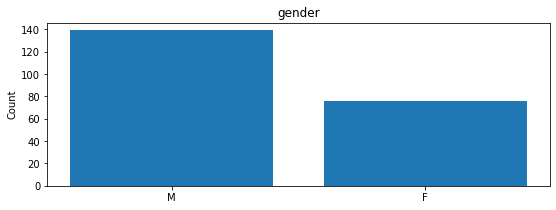


##################################################################

ssc_b:

Central    116
Others      99
Name: ssc_b, dtype: int64



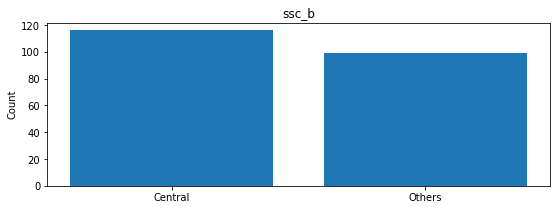


##################################################################

hsc_b:

Others     131
Central     84
Name: hsc_b, dtype: int64



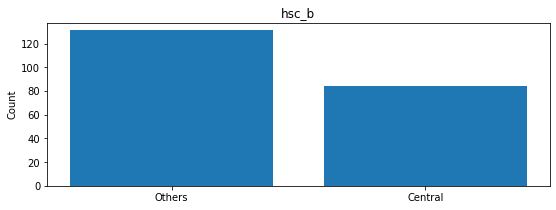


##################################################################

hsc_s:

Commerce    113
Science      91
Arts         11
Name: hsc_s, dtype: int64



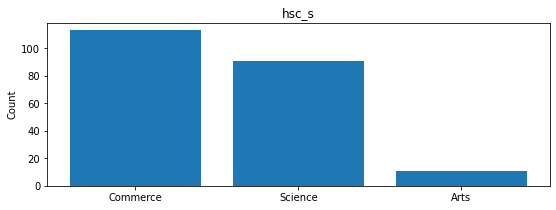


##################################################################

degree_t:

Comm&Mgmt    145
Sci&Tech      59
Others        11
Name: degree_t, dtype: int64



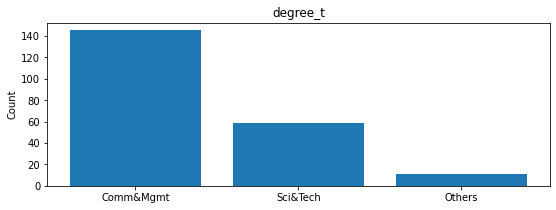


##################################################################

workex:

No     141
Yes     74
Name: workex, dtype: int64



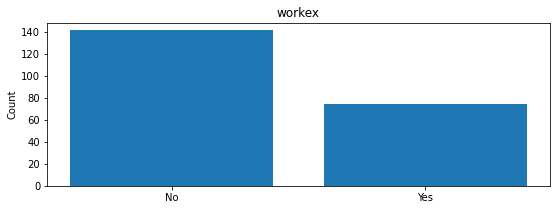


##################################################################

specialisation:

Mkt&Fin    120
Mkt&HR      95
Name: specialisation, dtype: int64



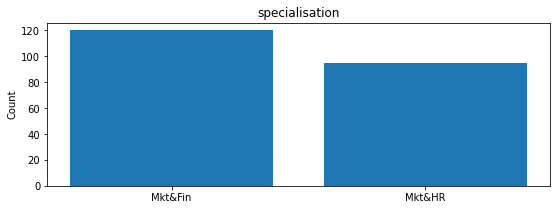


##################################################################

status:

Placed        148
Not Placed     67
Name: status, dtype: int64



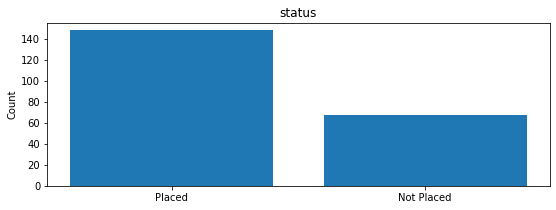


##################################################################



In [7]:
#For each categorical variable, plot the counts in a bar plot
for variable in categorical_list:

  column = df[variable]
  values = column.value_counts()

  #Print the name and value counts for the current categorical variable
  print("{}:\n\n{}\n".format(variable, values))
  
  #Plot
  plt.figure(figsize = (9,3))
  plt.bar(values.index, values)
  plt.xticks(values.index, values.index.values)
  plt.ylabel("Count")
  plt.title(variable)
  plt.show()
  
  print("\n##################################################################\n")

Let's also view the distributions of the numerical variables:

In [8]:
numerical_list = list(df.select_dtypes(include=['float64']).columns)

print("Numerical variables:", numerical_list)

Numerical variables: ['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary']


ssc_p:



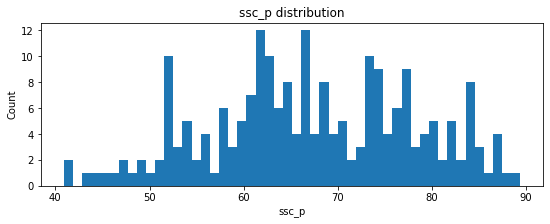


##################################################################

hsc_p:



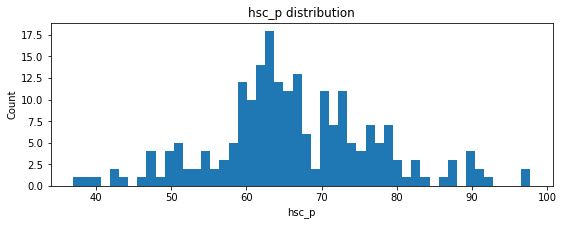


##################################################################

degree_p:



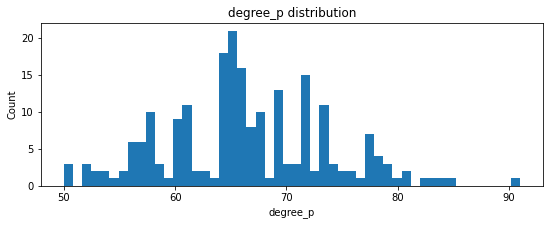


##################################################################

etest_p:



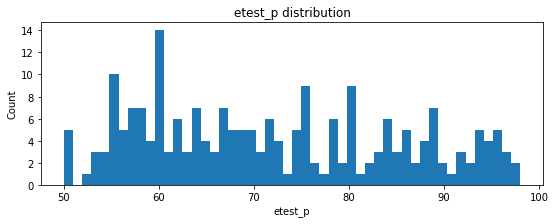


##################################################################

mba_p:



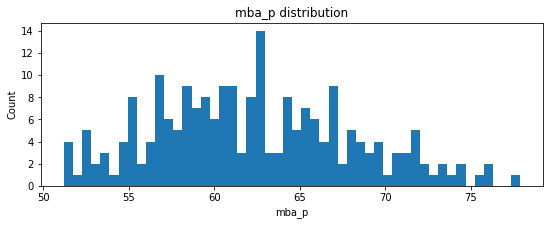


##################################################################

salary:



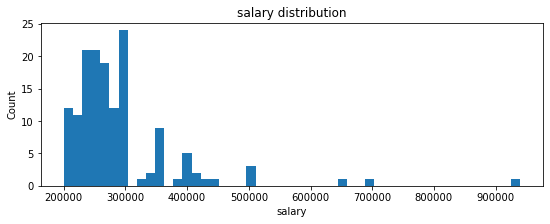


##################################################################



In [9]:
for variable in numerical_list:

  print("{}:\n".format(variable))

  #Plot a histogram for the variable
  plt.figure(figsize = (9,3))
  plt.hist(df[variable], bins = 50)
  plt.xlabel(variable)
  plt.ylabel("Count")
  plt.title("{} distribution".format(variable))
  plt.show()
  
  print("\n##################################################################\n")

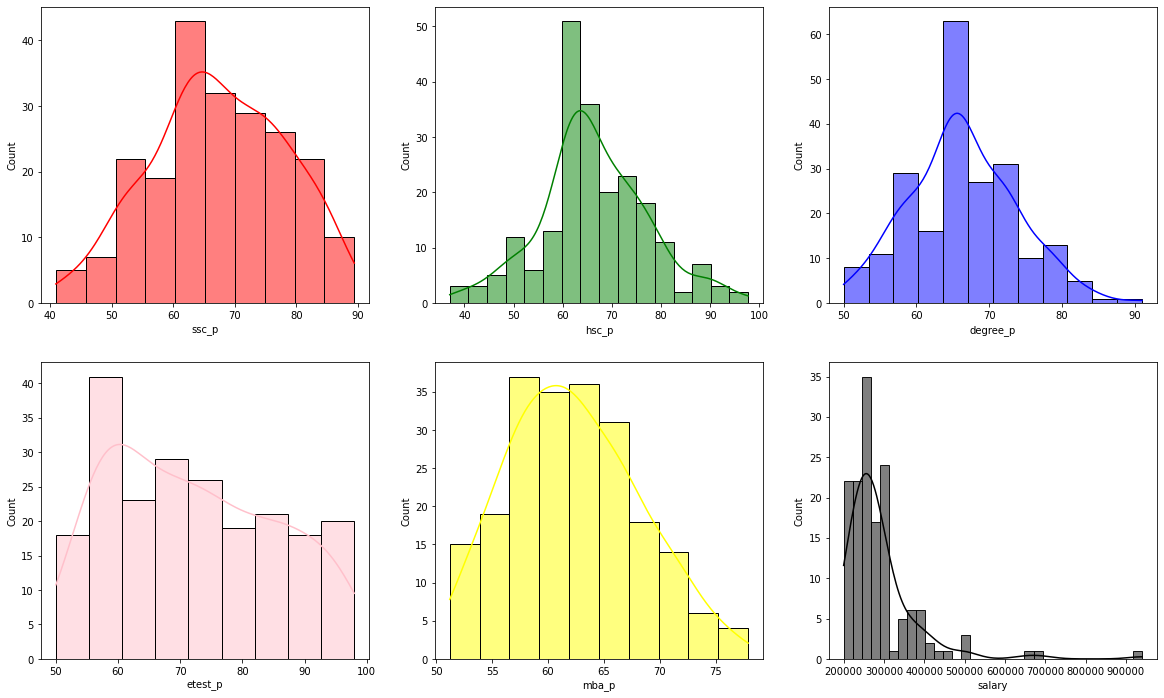

In [10]:
plt.figure(figsize=(20,12))

colors = ['red', 'green', 'blue', 'pink', 'yellow', 'black']

for n in range(len(numerical_list)):
  plt.subplot(2,3,n+1)
  sns.histplot(df[numerical_list[n]], color = colors[n], kde = True)

We can see that salary is skewed to the right. Other variables, which represent various grades of the students, mostly resemble a normal distribution.

## Data Exploration

<font color="red">

</font>

Let's examine the relationship between the numerical variables and placement results:

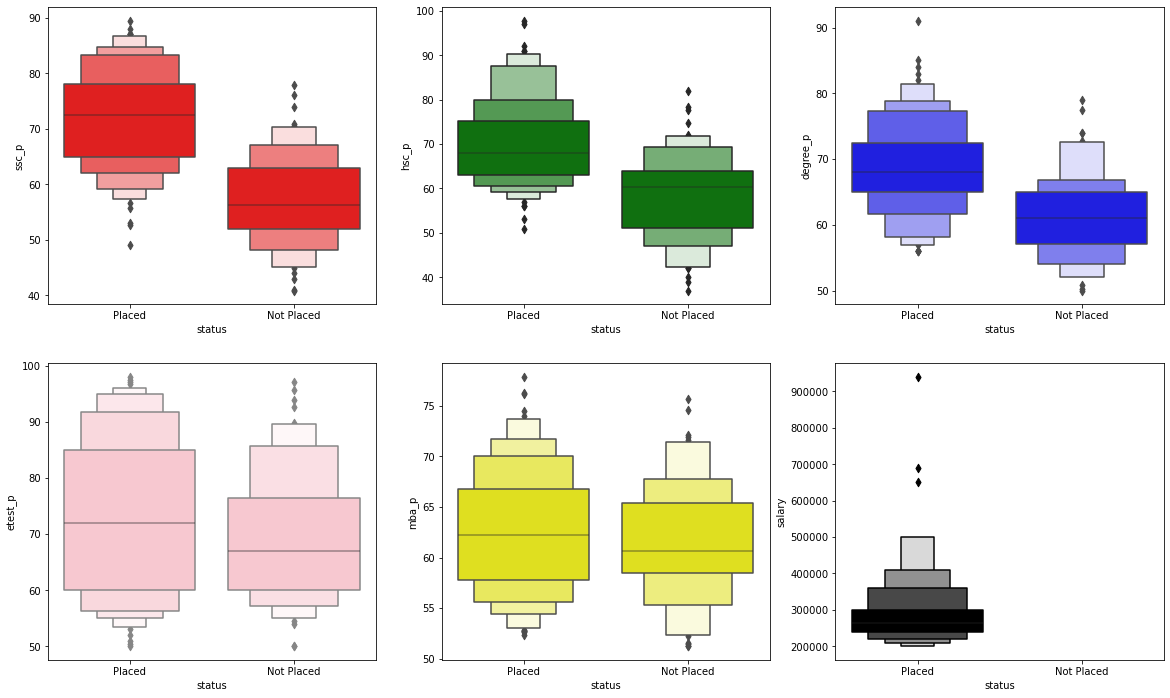

In [11]:
plt.figure(figsize=(20,12))

colors = ['red', 'green', 'blue', 'pink', 'yellow', 'black']

for n in range(len(numerical_list)):
  plt.subplot(2,3,n+1)
  sns.boxenplot(x=df['status'], y=df[numerical_list[n]], color=colors[n], scale="linear", data=df)

Note that these variables represent the following:

ssc_p: Secondary Education percentage- 10th Grade  
hsc_p: Higher Secondary Education percentage- 12th Grade  
degree_p: Degree Percentage  
etest_p: Employability test percentage (conducted by college)  
mba_p: MBA percentage  
salary: Salary offered by corporate to candidates  

We can observe that the percentages (grades) of the student seems to be correlated with the placement results. Each variable will be examined in detail later.

Also, we see that the non placed students don't have any value for salary.

In [12]:
df.isna().sum()

gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [13]:
print("{}% of the salary column is missing.".format((df['salary'].isnull().sum() / (len(df)) * 100).round(2)))

31.16% of the salary column is missing.


The salary is NaN for the students who were not placed, because they are not working. This means that 31.16% of students were not placed.

In [14]:
df[['status', 'salary']][np.isnan(df.salary)]

,status,salary
3,Not Placed,NaN
5,Not Placed,NaN
6,Not Placed,NaN
9,Not Placed,NaN
12,Not Placed,NaN
...,...,...
198,Not Placed,NaN
201,Not Placed,NaN
206,Not Placed,NaN
208,Not Placed,NaN


We are going to try the predict the placements, so let's inspect the relationship between the other variables with placements in more detail.  
Let's start with the degree percentage's impact on the placement:

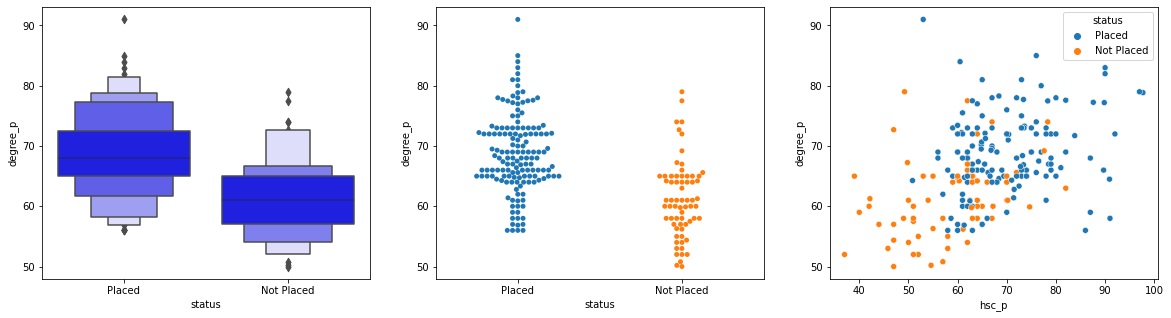

In [15]:
plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
sns.boxenplot(x=df['status'], y=df['degree_p'], color="b", scale="linear", data=df)

plt.subplot(1,3,2)
sns.swarmplot(x="status", y="degree_p", data=df)

plt.subplot(1,3,3)
sns.scatterplot(x="hsc_p", y="degree_p", data=df, hue="status")

plt.show()

When we look at the plots above, we can see that degree percentage is important to get placed. It can be said that the higher the 'degree_p' value, the higher the probability of getting placed, which is as expected.

Let's convert some categorical columns to numeric. This will make plots easier to work with.

In [16]:
df.status = df.status.map({'Placed': 1, 'Not Placed': 0})
df.gender = df.gender.map({'M': 0, 'F': 1})

Let's look at the effect of gender in placements.

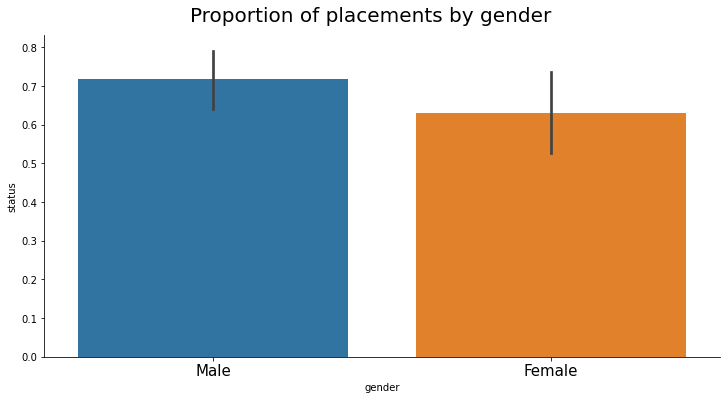

In [17]:
gender_plot = sns.catplot(y='status', x='gender', data=df, height=5, aspect=2, kind='bar')
gender_plot.set_xticklabels(['Male', 'Female'], size=15)
gender_plot.fig.suptitle('Proportion of placements by gender', size=20, y=1.05)
plt.show()

We can see that male students had a slightly higher chance of getting placed. Let's perform a hypothesis test to see if there is bias on the gender.

In [18]:
#status: 0 represents Not Placed, 1 represents Placed
#gender: 0 represents Male, 1 represents Female
gender_crosstab = pd.crosstab(df['gender'], df['status'], margins = False) 
gender_crosstab

status,0,1
gender,,
0,39,100
1,28,48


In [19]:
#This is a chi square test to find out if placements are affected by gender
H0 = "Gender does not have an effect on placement" #Null hypothesis
Ha = "Placement is affected by gender" #Alternative hypothesis

chi, p_value, dof, expected = stats.chi2_contingency(gender_crosstab)

significance = 0.05 #Significance level is 5%

if p_value < significance:
    print("{} because the p_value is {} which is less than {}".format(Ha, p_value.round(3), significance))
else:
    print("{} because the p_value is {} which is greater than {}".format(H0, p_value.round(3), significance))

Gender does not have an effect on placement because the p_value is 0.24 which is greater than 0.05


Now, let's look at which specialization in higher secondary education (hsc_s) is more favored for the placements:

In [20]:
#Assign 0 to Commerce, 1 to Science, 2 to Arts
df.hsc_s = df.hsc_s.map({'Commerce': 0, 'Science': 1, 'Arts': 2}) 

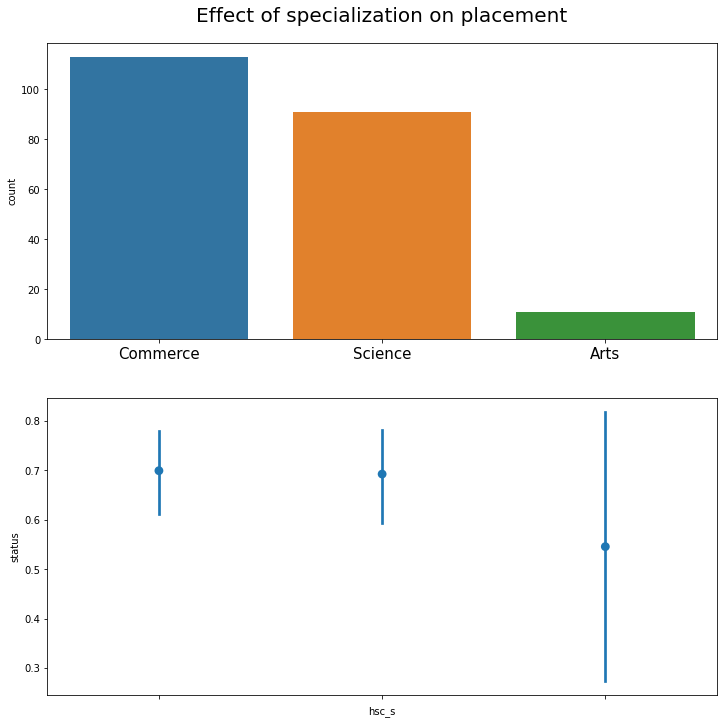

In [21]:
fig = plt.figure(figsize=(12, 12))

plt.subplot(2,1,1)
hsc_s_plot = sns.countplot(x=df.hsc_s)
hsc_s_plot.set_title('Effect of specialization on placement', fontsize=20, y=1.05)
hsc_s_plot.set_xticklabels(['Commerce', 'Science', 'Arts'], size=15)
hsc_s_plot.set(xlabel=None)

plt.subplot(2,1,2)
hsc_s_status = sns.pointplot(x=df.hsc_s, y='status', data=df, ci=95, join=False)
hsc_s_status.set_xticklabels([])

plt.show()

The plot on the top shows the counts of these specializations, and the plot on the bottom shows the proportion of placements with respect to the specializations.  
We can observe that people with a specialization in 'Arts' have a lower chance of getting placed.

Let's look at the correlations between every variable.

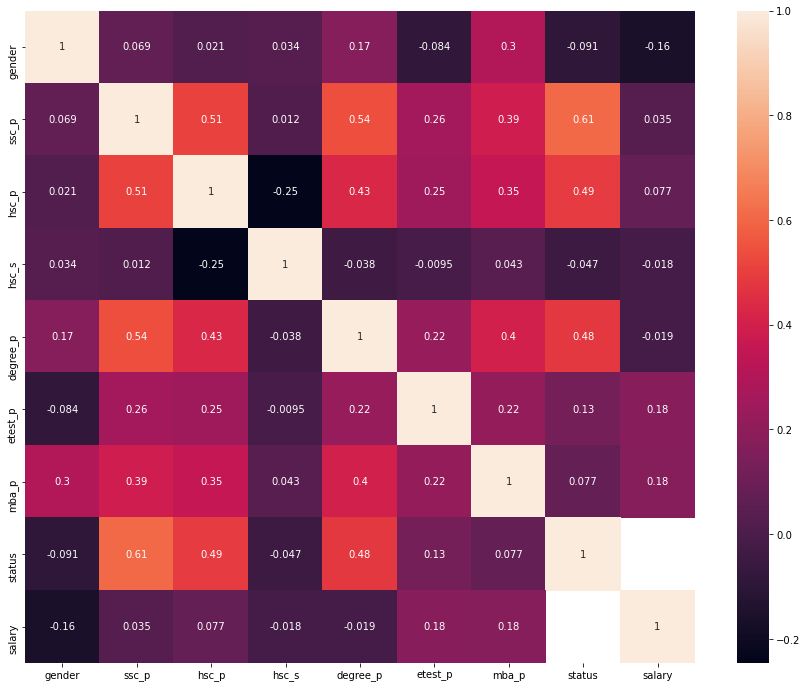

In [22]:
plt.figure(figsize=(15, 12))

sns.heatmap(df.corr(),annot=True)
plt.show()

We can observe that the percentages (grades) have high correlation with each other.  
Also, the grades have high correlation with status (placement). 

## Machine Learning Models

DROPPING STRING  AND SALARY COLUMN

In [23]:


string_list = list(df.select_dtypes(include=['object']).columns)

mldf=df
mldf = df.drop(string_list, axis=1)
mldf.drop(columns=['salary'], inplace=True)
y= mldf["status"]
X= mldf.drop(["status"], axis=1)



print(mldf)

     gender  ssc_p  hsc_p  hsc_s  degree_p  etest_p  mba_p  status
0         0  67.00  91.00      0     58.00     55.0  58.80       1
1         0  79.33  78.33      1     77.48     86.5  66.28       1
2         0  65.00  68.00      2     64.00     75.0  57.80       1
3         0  56.00  52.00      1     52.00     66.0  59.43       0
4         0  85.80  73.60      0     73.30     96.8  55.50       1
..      ...    ...    ...    ...       ...      ...    ...     ...
210       0  80.60  82.00      0     77.60     91.0  74.49       1
211       0  58.00  60.00      1     72.00     74.0  53.62       1
212       0  67.00  67.00      0     73.00     59.0  69.72       1
213       1  74.00  66.00      0     58.00     70.0  60.23       1
214       0  62.00  58.00      1     53.00     89.0  60.22       0

[215 rows x 8 columns]


we give 60% for training and 20% for testing and 20% forvalidation

In [24]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
# 60% for training and 40% for testing-validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.60, random_state=1)
# 20% validation, 20% test
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.50, random_state=1)


In [25]:
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

#Decision Tree Training
model_dt = tree.DecisionTreeClassifier(random_state=1) #Create decision tree classifier object
classifier_dt=model_dt.fit(X_train, y_train) #train the classifier using the training data


model_rf = RandomForestClassifier(n_estimators=100, random_state=1)
classifier_rf=model_rf.fit(X_train, y_train)


Decision Tree and Random Forest Validation Accuracy:

In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve

#Decision Tree Testing
dt_predictions_val = model_dt.predict(X_val)
dt_acc_val = accuracy_score(y_val, dt_predictions_val)

rf_predictions_val = model_rf.predict(X_val)
rf_acc_val = accuracy_score(y_val, rf_predictions_val)

print("Decision Tree Validation Accuracy:"+str(dt_acc_val))
print("Random Forest Validation Accuracy:"+str(rf_acc_val))



Decision Tree Validation Accuracy:0.7692307692307693
Random Forest Validation Accuracy:0.8


### Display Confusion Matrix

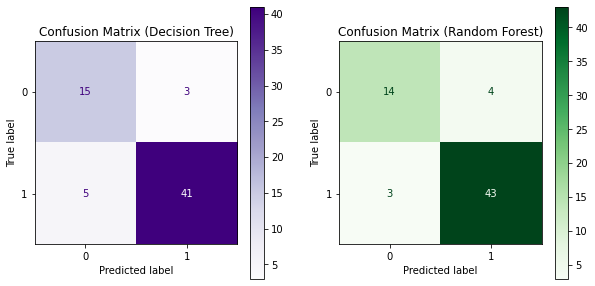

In [27]:
from sklearn.metrics import plot_confusion_matrix

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

disp_rf =plot_confusion_matrix(classifier_dt,X_test, y_test,cmap=plt.cm.Purples, ax=ax1)

disp_gb =plot_confusion_matrix(classifier_rf,X_test,y_test,cmap=plt.cm.Greens, ax=ax2)

ax1.title.set_text('Confusion Matrix (Decision Tree)')
ax2.title.set_text('Confusion Matrix (Random Forest)')

plt.show()

### Decision Tree Visualization

In [28]:
from sklearn.tree import export_text

# execute and print the ouput
print(export_text(model_dt, feature_names=list(X.columns)))

|--- ssc_p <= 54.94
|   |--- class: 0
|--- ssc_p >  54.94
|   |--- hsc_p <= 54.00
|   |   |--- class: 0
|   |--- hsc_p >  54.00
|   |   |--- degree_p <= 67.50
|   |   |   |--- mba_p <= 69.16
|   |   |   |   |--- mba_p <= 52.47
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- mba_p >  52.47
|   |   |   |   |   |--- mba_p <= 59.49
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- mba_p >  59.49
|   |   |   |   |   |   |--- ssc_p <= 69.50
|   |   |   |   |   |   |   |--- ssc_p <= 64.50
|   |   |   |   |   |   |   |   |--- mba_p <= 60.77
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- mba_p >  60.77
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- ssc_p >  64.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- ssc_p >  69.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |--- mba_p >  69.16
|   |   |   |   |--- class: 0
|   |   |--- degree_p >  67.50
|   |   |   |---

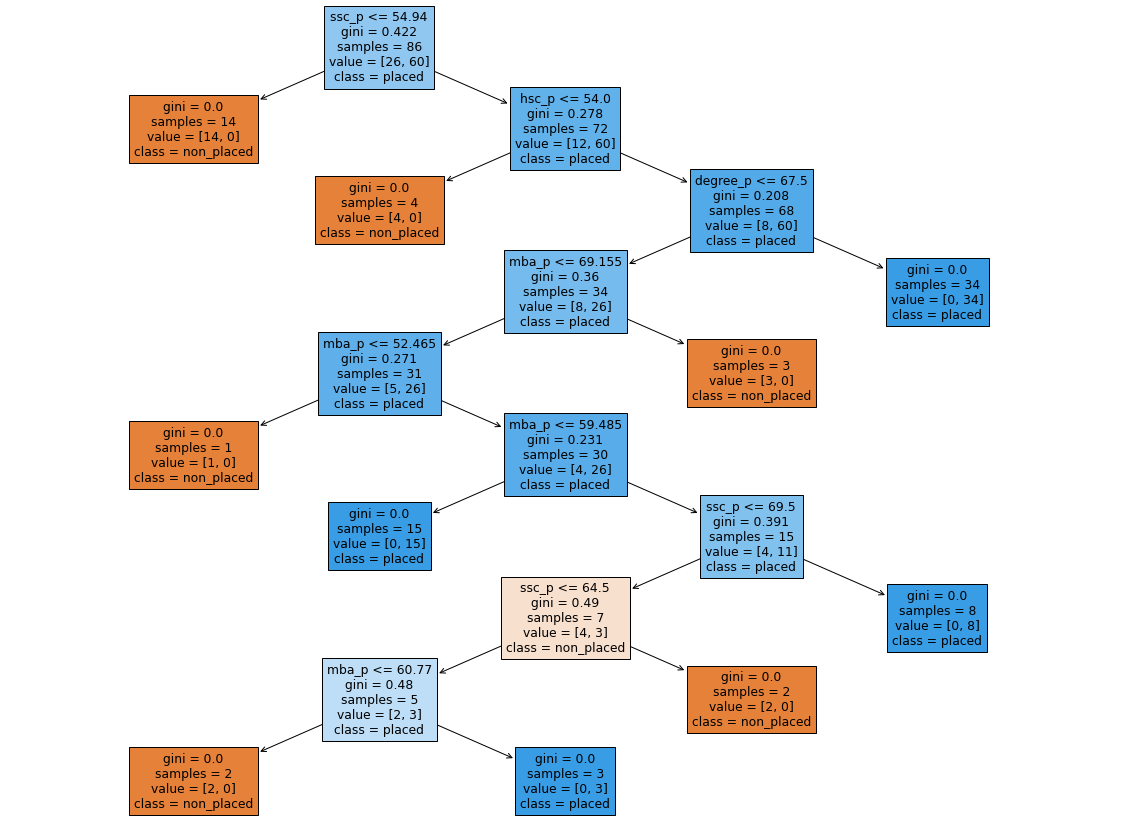

In [29]:
from sklearn.tree import plot_tree

# generate the tree
fig = plt.figure(figsize=(20, 15))
plot_tree(model_dt, feature_names=X.columns.values, class_names=["non_placed", "placed"], filled=True);

### Hyperparameter Tuning 

In [30]:
n_estimators=[50,100,300,500]
max_features=[2,3,5,7]
from sklearn.metrics import average_precision_score

pred_scors=[]
print('random forest:')
for i in n_estimators:
    
  #random forest
  model_rf = RandomForestClassifier(n_estimators=i, random_state=0 )

  classifier_rf= model_rf.fit(X_train, y_train)
  y_score_rf = classifier_rf.predict_proba(X_test)[:, 1]
  average_precision = average_precision_score(y_test, y_score_rf)
  pred_scors.append(average_precision)
  print('n_estimators',i,' AUPRC score:',average_precision)

dic_rf={n_estimators[i] : pred_scors[i] for i in range(len(n_estimators))}
sorteddic=sortdic=dict(sorted(dic_rf.items(), key=lambda item: item[1]))
best_estimator=list(sorteddic)[-1]
print('Best n_estimators for random forest :',best_estimator)

pred_scors_max_features=[]

for i in max_features:

  model_rf = RandomForestClassifier(n_estimators=best_estimator, random_state=0,max_features=i )

  classifier_rf= model_rf.fit(X_train, y_train)
  y_score_rf = classifier_rf.predict_proba(X_test)[:, 1]
  average_precision = average_precision_score(y_test, y_score_rf)
  pred_scors_max_features.append(average_precision)
  print('n_estimators',best_estimator,'max_features',i,' AUPRC score:',average_precision)

dic_max_rf={max_features[i] : pred_scors_max_features[i] for i in range(len(max_features))}

sorteddic_max_rf=sortdic=dict(sorted(dic_max_rf.items(), key=lambda item: item[1]))

best_estimator_max=list(sorteddic_max_rf)[-1]
print('for random forest, best n_estimators=',best_estimator,'and the best max_features=',best_estimator_max )



random forest:
n_estimators 50  AUPRC score: 0.9804680104322863
n_estimators 100  AUPRC score: 0.9816684992290536
n_estimators 300  AUPRC score: 0.9804563156898818
n_estimators 500  AUPRC score: 0.9836641888292199
Best n_estimators for random forest : 500
n_estimators 500 max_features 2  AUPRC score: 0.9836641888292199
n_estimators 500 max_features 3  AUPRC score: 0.984534916990001
n_estimators 500 max_features 5  AUPRC score: 0.9809275356620546
n_estimators 500 max_features 7  AUPRC score: 0.9790553279791203
for random forest, best n_estimators= 500 and the best max_features= 3


### Results & Discussion

In [31]:

model_rf_best = RandomForestClassifier(n_estimators=best_estimator,max_features= best_estimator_max  , random_state=1)
classifier_rf_best=model_rf.fit(X_train, y_train)
rf_predictions_val_best = model_rf.predict(X_val)

rf_acc_val = accuracy_score(y_val, rf_predictions_val)
print("Random Forest Validation Accuracy:"+str(rf_acc_val))


Random Forest Validation Accuracy:0.8


Our Random Forest model achieved an 83% accuracy after the hyperparameter tuning. The accuracy of the Decision Tree was 76%, so we decided to use Random Forest.  
Here is the confusion matrix of the resulting model:

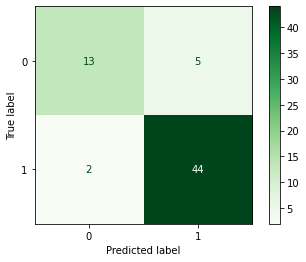

In [32]:
disp_gb =plot_confusion_matrix(classifier_rf_best,X_test,y_test,cmap=plt.cm.Greens)

plt.show()

## Conclusion

We explored the dataset by examining the relationship between various variables using plots, and found out that the degrees of the students affected the placement the most. The degrees that the students recieved throughout their education also had a high correlation, which indicates that the grades a student recieves earlier in their education has a relationship with their graduation grades. We also examined if there is bias on the gender of the students for the placements, and concluded that there is none. We noticed that "Arts" specialization was the least desired one among others for a student to get placed.

From our machine learning model, we found the random forest validation accuracy of 0.80. This is a better accuracy than out other model, Decision Tree. However, other models may lead to higher effective results.

After applying hyperparameter tuning our accuracy only increased by 3% to 83% which is a very small increase compared to our expectations.

The main disadvantage of the model is that our dataset contained string values. While designing the machine learning model, these string values were not present.

To conclude, we have a model that can effectively predict whether a given student will be placed or not.

## Future Work & Work Division

We may examine the relationships between the other variables that we haven't included in our study in the future.  
It's possible that we could see different results with a different Machine Learning method, that potentially take into account string values. Another potential scenario is that maybe the model can predict the salary of those who are placed. So another future work can be adding a model that predicts the salary.


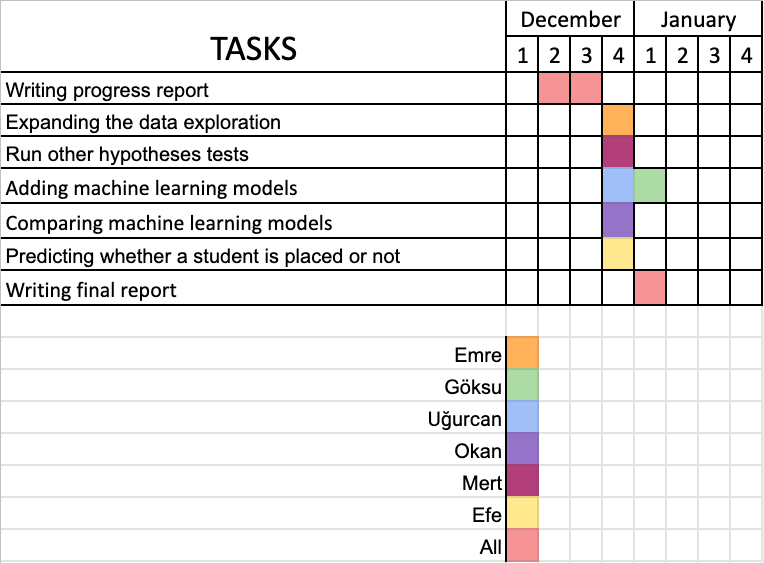